In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

act = pd.read_csv('OTg6QzA_activities.csv')
act.shape

(66281, 4)

In [2]:
act['p_timestamp'] = act['timestamp'].shift(1)
act['p_x'] = act['X'].shift(1)
act['p_y'] = act['Y'].shift(1)
act['p_z'] = act['Z'].shift(1)
act.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
0,2022-01-01 00:01:40.363,33,76,56,None,NaN,NaN,NaN
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0


In [3]:
cleaned = act.dropna()
cleaned.head(5) 

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0


In [5]:
def calc_dist(df):
    x_d = df['X'] - df['p_x']
    y_d = df['Y'] - df['p_y']
    z_d = df['Z'] - df['p_z']
    return np.sqrt(x_d**2 + y_d**2 + z_d**2)
cleaned.loc[:,'dist'] = cleaned.loc[:,['X','p_x','Y','p_y','Z','p_z']].apply(calc_dist, axis=1)


cleaned.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111


In [14]:
from datetime import datetime
def calc_timediff(df):
    d1 = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    d2 = datetime.strptime(df['p_timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return(d1-d2).total_seconds()

cleaned['d_time'] = cleaned[["timestamp","p_timestamp"]].apply(calc_timediff, axis=1)
cleaned.head(5)

C:\Users\302\AppData\Local\Temp\ipykernel_8388\1726686846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['d_time'] = cleaned[["timestamp","p_timestamp"]].apply(calc_timediff, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901


In [15]:
cleaned.loc[:,["timestamp" , "p_timestamp"]]

,timestamp,p_timestamp
1,2022-01-01 00:01:42.961,2022-01-01 00:01:40.363
2,2022-01-01 00:01:45.562,2022-01-01 00:01:42.961
3,2022-01-01 00:01:48.163,2022-01-01 00:01:45.562
4,2022-01-01 00:02:08.864,2022-01-01 00:01:48.163
5,2022-01-01 00:02:21.765,2022-01-01 00:02:08.864
...,...,...
66276,2022-01-31 23:28:00.481,2022-01-31 23:27:55.381
66277,2022-01-31 23:28:41.683,2022-01-31 23:28:00.481
66278,2022-01-31 23:28:49.383,2022-01-31 23:28:41.683
66279,2022-01-31 23:32:36.426,2022-01-31 23:28:49.383


In [19]:
def calc_act(df):
    if df['d_time'] != 0:
        return np.abs(df['dist'] / df['d_time'])
    else:
        return 0
    
    
cleaned['calc_act'] = cleaned[["dist" , "d_time"]].apply(calc_act,axis=1)
cleaned.head(5)

C:\Users\302\AppData\Local\Temp\ipykernel_8388\2318788515.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['calc_act'] = cleaned[["dist" , "d_time"]].apply(calc_act,axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475


<Axes: title={'center': 'calculation of activity'}, xlabel='time series', ylabel='activity [cm/sec]'>

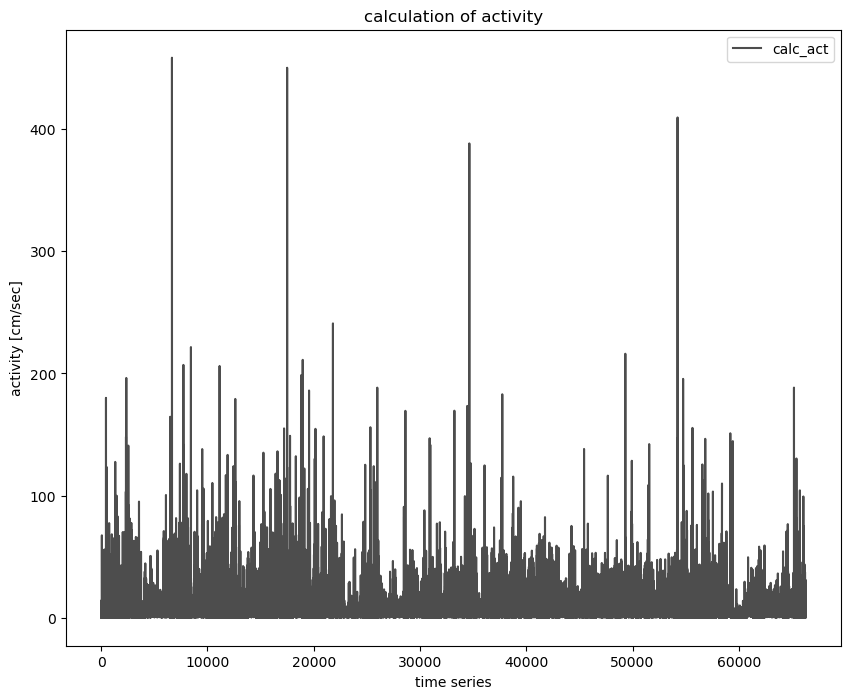

In [20]:
plt.rcParams['figure.figsize'] = [10,8]

cleaned.plot(y="calc_act", color="0.3" , title="calculation of activity", ylabel="activity [cm/sec]", xlabel="time series")

In [22]:
len(cleaned[cleaned['calc_act'] < 50.0])/len(cleaned)

0.9916113458056729

In [23]:
cleaned.dtypes

timestamp       object
X                int64
Y                int64
Z                int64
p_timestamp     object
p_x            float64
p_y            float64
p_z            float64
dist           float64
d_time         float64
calc_act       float64
dtype: object

In [24]:
cleaned2 = cleaned.copy()
cleaned2 = cleaned2[['timestamp', 'calc_act']]
cleaned2['timestamp'] = cleaned2['timestamp'].astype('datetime64[ns]')
cleaned2 

,timestamp,calc_act
1,2022-01-01 00:01:42.961,4.251486
2,2022-01-01 00:01:45.562,4.953517
3,2022-01-01 00:01:48.163,9.146772
4,2022-01-01 00:02:08.864,1.134954
5,2022-01-01 00:02:21.765,0.980475
...,...,...
66276,2022-01-31 23:28:00.481,3.167744
66277,2022-01-31 23:28:41.683,0.084076
66278,2022-01-31 23:28:49.383,1.055070
66279,2022-01-31 23:32:36.426,0.030831


In [25]:
cleaned2 = cleaned2.set_index('timestamp')
cleaned2.dtypes

calc_act    float64
dtype: object

In [26]:
tenmin = cleaned2.resample('10min')
result = tenmin['calc_act'].agg(['mean','min','max'])
result

,mean,min,max
timestamp,,,
2022-01-01 00:00:00,2.359774,0.205775,9.146772
2022-01-01 00:10:00,3.804910,0.011198,12.985407
2022-01-01 00:20:00,1.204413,0.176624,3.200697
2022-01-01 00:30:00,0.065608,0.065608,0.065608
2022-01-01 00:40:00,NaN,NaN,NaN
...,...,...,...
2022-01-31 22:50:00,5.271830,0.174116,16.061886
2022-01-31 23:00:00,NaN,NaN,NaN
2022-01-31 23:10:00,11.671627,0.090195,31.025631


<Axes: title={'center': 'resample by 10-minute'}, xlabel='timestamp', ylabel='Average activity [cm/sec]'>

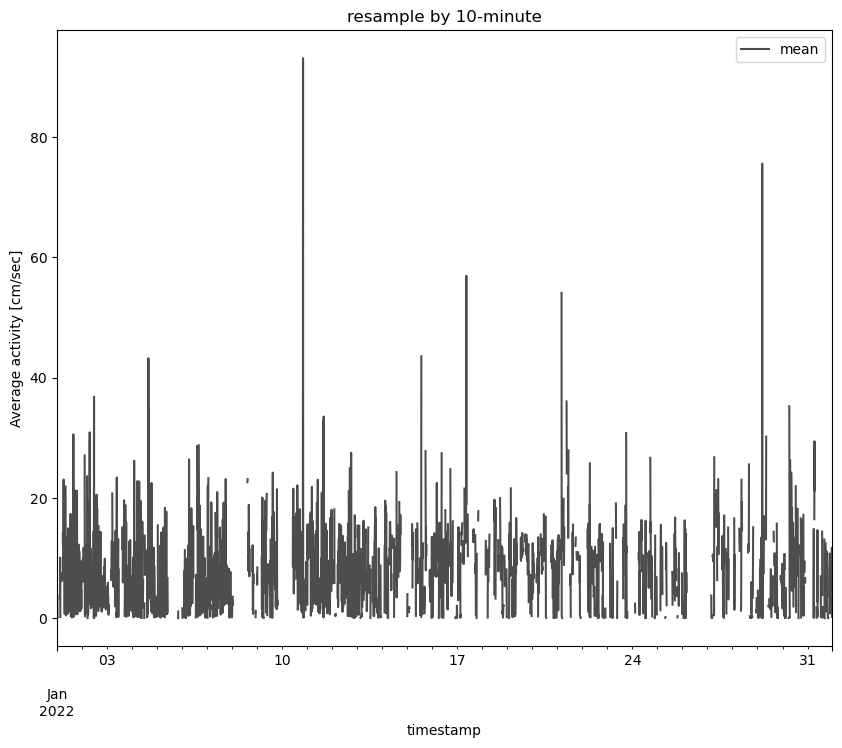

In [27]:
result.plot(y="mean", color="0.3",title="resample by 10-minute", ylabel="Average activity [cm/sec]",xlabel="timestamp")

In [34]:
oneHour = cleaned2.resample('1H')
result = oneHour['calc_act'].agg(['mean','min','max'])
result


C:\Users\302\AppData\Local\Temp\ipykernel_8388\1295618251.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  oneHour = cleaned2.resample('1H')


,mean,min,max
timestamp,,,
2022-01-01 00:00:00,3.025915,0.011198,14.338601
2022-01-01 01:00:00,3.948859,0.013024,7.813303
2022-01-01 02:00:00,1.965045,0.006504,9.646105
2022-01-01 03:00:00,9.173303,0.065512,67.447458
2022-01-01 04:00:00,6.503876,0.000000,28.781980
...,...,...,...
2022-01-31 19:00:00,3.453507,0.014785,39.131190
2022-01-31 20:00:00,0.052261,0.005667,0.112500
2022-01-31 21:00:00,8.707639,0.076334,43.773557


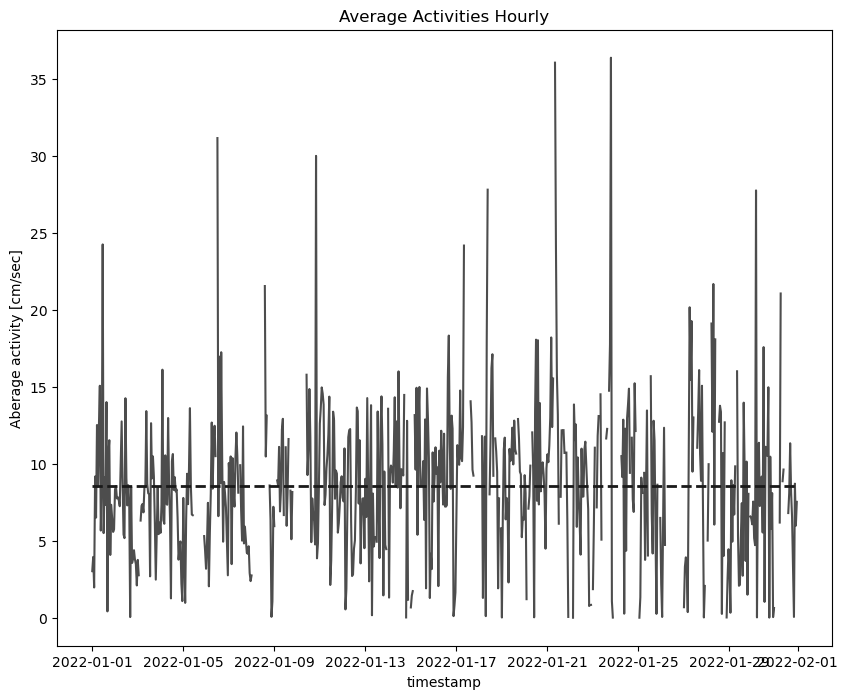

In [35]:
plt.plot(result['mean'], color='0.3')

plt.hlines(result['mean'].mean(), min(result.index), max(result.index), color = '0.1',linestyle='--', linewidth=2)
plt.title("Average Activities Hourly")
plt.xlabel("timestamp")
plt.ylabel("Aberage activity [cm/sec]")

plt.show()



In [37]:
oneDay = cleaned2.resample('D')
result = oneDay['calc_act'].agg(['mean','min','max'])
result

,mean,min,max
timestamp,,,
2022-01-01,8.801942,0.000000,180.000000
2022-01-02,6.869050,0.000000,196.279481
2022-01-03,7.388244,0.000000,458.448986
2022-01-04,8.304327,0.000000,221.561886
2022-01-05,7.711977,0.005796,110.315326
2022-01-06,10.305163,0.000000,206.091424
2022-01-07,6.816522,0.000000,179.109595
2022-01-08,9.871009,0.000000,116.407418
2022-01-09,8.701704,0.000000,135.110723


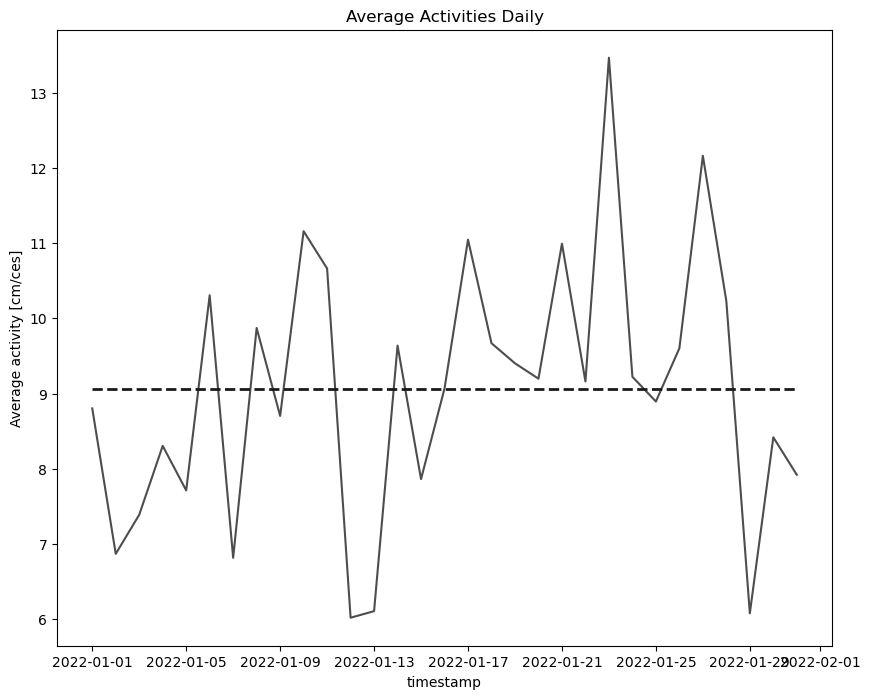

In [38]:
plt.plot(result['mean'], color='0.3')
plt.hlines(result['mean'].mean(), min(result.index), max(result.index), color='0.1', linestyles='--',linewidth=2)

plt.title("Average Activities Daily")
plt.xlabel("timestamp")
plt.ylabel("Average activity [cm/ces]")

plt.show()

In [ ]:


#  날짜를 무시하고 "1시간 단위"로 그룹화
cleaned2['hour_group'] = cleaned2.index.floor('H').time  # HH:MM:SS만 남김


result = cleaned2.groupby('hour_group')['calc_act'].agg(['sum', 'mean', 'min', 'max'])

#  결과의 인덱스를 보기 쉽게 "HH:00" 문자열로 변환
result.index = [f"{t.hour:02d}:00" for t in result.index]

print(result)



                sum       mean  min         max
00:00  19224.238533   8.010099  0.0  148.923669
01:00  24183.203586   9.202132  0.0  132.192341
02:00  33364.854957  10.846832  0.0  206.975693
03:00  21521.134973   9.107548  0.0  198.477736
04:00  22554.838753   7.858829  0.0  388.290526
05:00  27710.631977   9.342762  0.0  138.154365
06:00  35368.596844   9.735369  0.0  240.948369
07:00  19007.480505   9.930763  0.0  196.279481
08:00  41706.494114  10.444902  0.0  458.448986
09:00  27177.067729   8.357032  0.0  186.006285
10:00  24710.269362   6.863964  0.0  221.561886
11:00   8970.377675   4.277719  0.0  140.890028
12:00  20183.365440   7.032532  0.0  206.091424
13:00  22409.967104   9.318074  0.0  136.228474
14:00  30263.519483   9.478083  0.0  138.051923
15:00  31510.438570   9.194759  0.0  179.109595
16:00  21560.663498   9.668459  0.0  154.983818
17:00  37173.458310  10.518805  0.0  169.381220
18:00  33288.105812   9.021167  0.0  155.940378
19:00  15820.887165   7.558952  0.0  409

C:\Users\302\AppData\Local\Temp\ipykernel_8388\905282497.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  cleaned2['hour_group'] = cleaned2.index.floor('H').time  # HH:MM:SS만 남김


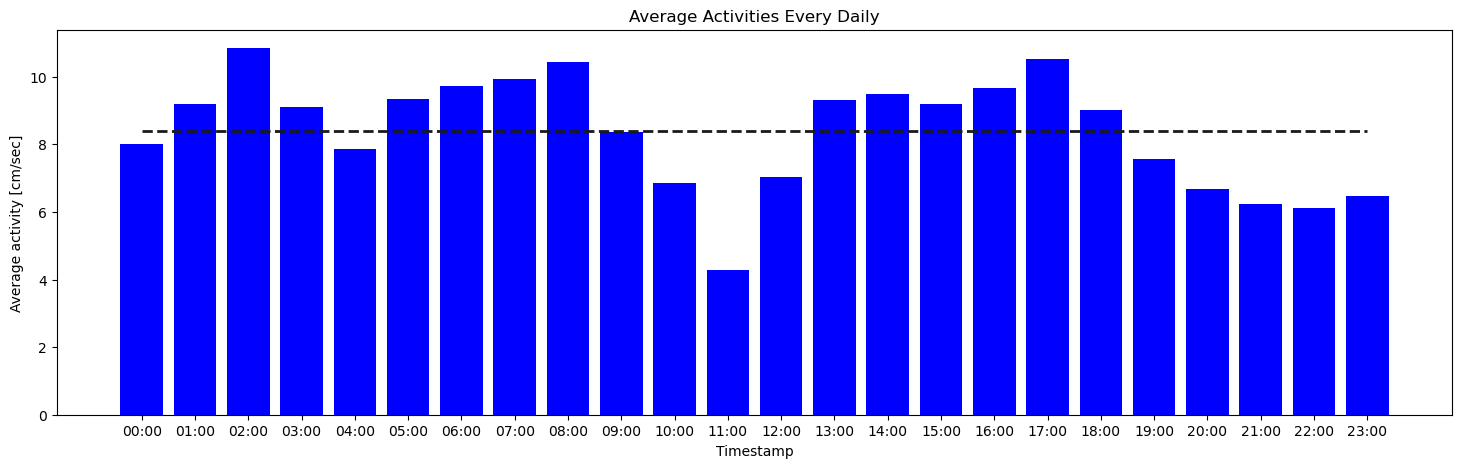

In [108]:

import matplotlib.pyplot as plt

#  그래프 크기 조절 (너비 18, 높이 5)
plt.figure(figsize=(18, 5))

#  평균값 그래프 그리기
plt.bar(result.index,result['mean'], color='b')

#  평균선 추가
plt.hlines(result['mean'].mean(), min(result.index), max(result.index), color='0.1', linestyles='--', linewidth=2)

#  그래프 제목 및 축 라벨 설정
plt.title("Average Activities Every Daily")
plt.xlabel("Timestamp")
plt.ylabel("Average activity [cm/sec]")

#  그래프 출력
plt.show()
